# The Computing Challenge 2024 / 2025

This year the Computing Challenge revolves around writing a code to study a co-polymer brush. A polymer brush is a group of polymer chains attached to a surface. 
These types of polymers are often used as ( stimuli-responsive ) coatings to modify surface properties, for example, to protect surfaces against the adsorption of specific molecules. Adsorption will strongly depend on the density of the polymer close to the surface and (at least under some assumptions we will not discuss), the higher the density of the brush close to the surface, the lower the adsorption probability. In this year challenge you will write a code to do Monte Carlo simulations to study the effect of different design parameters, and use it to choose the optimal system among 4 candidates, described in detail below.


## Problem description / Rules of the game

You have to compare 2 systems: 
1) A co-polymer made of two different monomers $A$ and $B$. $A$ attracts $B$ but repels $A$, $B$ attracts $A$ and repels other $B$. There are 10 monomers per polymer and each polymer is made by 2 blocks: 5 monomers of type $A$ followed by 5 monomers of type $B$.
2) Same system above, but now the polymer is made of A and B alternated in a pattern A-B-A-B-A...

## A coarse-grained description of a polymer

For each polymer, we will be using a "bead-spring" model. In practice, each monomer is replaced by spherical particles. The first particle (always of type A) is connected to the surface by a spring at a random point $r_0$. Each other particle/monomer is connected with the previous one and the following one (except the last of each polymer chain, which is obviously connected only with the previous one) by another spring. The function describing the energy stored in a spring is given by:

1) $E_{spring}(ij) = {1\over2} \,k\, d_{ij}^2$, where $d_{ij}$ is the distance between particle $i$ and particle $j$ (or particle $1$ and the grafting point $r_0$ on the surface, in case of the first particle).

Furthermore, each particle interact with each other particle in the system (both those belonging to the same polymer or to other polymers) with the following energy function:

2) $E_{int}(ij) = C_{int} \cos( \pi / 2 \, d_{ij} / R )$ for $d_{ij} < R$, $0$ if $d_{ij} \le R$ 

Each particle also interact with the grafting surface via the following potential:

3) $E_{surf}(i) = 10^9 for $d_{i} \lt 0$ and $0$ if $d_{i} > 0$, where $d_i$ is the $z$ coordinate of the particle, and the surface is supposed to be the plane $z=0$

The total energy of the system is given by:

$E_{tot} = \sum_i E_{surf}(i) + \sum_i \sum_j \left(E_{int}(ij) + E_{spring}(ij)\right)$

## System quantities / characteristics

The surface is a square grid of size $10 L \times 10 L$ with $L=1$ and contains 50 chains. The grafting point for each chain $r_0$ must be chosen randomly on one of the grid points, however, no two chains can be grafted to the same grid point. Once a grafting point for the polymer has been chosen, prepare each chain as 10 particles with the same $(x,y)$ position and equally spaced by 1 on the $z$ direction.

The value of the spring constant describing $E_{spring}$ is $k=1$. The value of the coefficient $C_{int}$ for the interaction energy is positive for particles that repel each other and positive for particles that attract each other (see more later). The value of $R$ (which basically sets the size of a monomer) is also $R=1$. 

## Evolving the system

To calculate the equilibrium density of the polymer at the surface, you need to follow / implement the following protocol.

First prepare an initial state for the system, randomly choosing the initial positions of the particles that describe the different polymer chains.

Then evolve this initial state in the following way:

0) Calculate the energy of the system $E_{tot}$ in the current state 
1) Choose one particle at random
2) Choose a random direction between (x,y,z)
3) Choose a random displacement within the interval $(-1,1)$
4) Calculate the difference in energy between the previous state and the one generated after the random displacement
5) Choose a random number between $[0,1)$, let's call it $k$. If $\exp( - \Delta E / T ) < k$ then accept the new state, otherwise go back to the previous one. Every 1000 trials, save the positions of the particles at that point (you will need this information later). It does not matter if the move is accepted or not, a trial is considered every time an attempt is being made, not if successful.
6) Go back to step 1) and reiterate this algorithm.

Repeat the previous loop (0-6) for $10^5$ iterations. You also need to repeat this simulation for 10 different initial configurations of the system. You should also repeat this experiment for 3 different temperatures: $T=0.5$, $1$ and $2$ and for $3$ different values of the interaction constant $C_{int}=-0.5,-1$ (for attractive particles) and correspondingly $0.5,1$ for repulsive particles.

With the saved configurations, you can calculate the equilibrium densities of particle close to the surface and plot it as a function of the number of steps made. We define the density close to the surface (somewhat arbitrarily) as the number of particles within a distance of $2$ from the surface, divided by the volume of this region (which is $ V = 10L \times 10L \times 2$). You do not need to plot the density for all the steps, just for those saved. The equilibrium density is the average over all the steps generated, after the density has reached steady state. The steady state is reached when the plot of the density vs number of steps only randomly oscillates around some constant value, but there is no net drift. In practice, your system will likely reach steady state after about $50,000$ steps have been made. **Please note it will take some time before the $10^5$ steps are made, and this will massively depend on the way you implement your algorithm!

## Tip

- To calculate the variation in energy between an attempted configuration and the current one, you do not need to calculate the energy of the whole system, but only that part affected by the change of the particle you are trying to move. Implementing this step in the right way can speed up your algorithms by a factor of > 1000.


## Visualing the result

 **Visualising what happens in the system can be of great help!** In your case, you can do that, for example, by adapting the following piece of code to print the position of the particles that are adsorbed on the surface (this code prints circles of a given radius and at a give position). *You do not need to do it but it might be helpful for you*


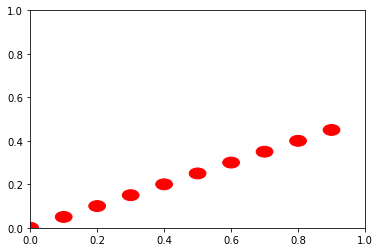

In [ ]:
#Check what this piece of code does!

import matplotlib.pyplot as plt

fig = plt.gcf() #Defines a figure object
ax = fig.gca() #Defines an axis object

for i in range(10):
    x = 0.1 * i
    y = 0.05 * i
    # The following adds red circles at position x,y of radius 0.025
    ax.add_patch( plt.Circle(( x, y ), radius=0.025, color = "red" ) ) 
                                            

plt.show()

## The Question to answer

**Which of the 2 different polymer has the highest density at the surface, as defined above? Does the answer depend on the temperature simulated and on the values of $C_{int}$ chosen?** 


## Material to be submitted 

> 1) The code prepared to solve the challenge, either as a jupyter notebook or as a standard python file (if you know how to write one). 

> 2) The plot of the density vs steps (for one of the initial configurations) and for all the different combinations. In practice there are 12 combinations (2 types of copolymers x 3 temperatures x 2 values for the coefficient $C_{int}$.

> 3) A table with the reported value of the equilibrium density and its variance for all the combinations. The variance can be calculated as the variance of the mean density (calculated on the last 50,000 steps) over the different initial random configurations for each system. The results of the table will be considered as the answer to the question above. 

Each person in the group will have to submit this material.

## Submission and marking 

Submit the output requested above as a single compressed file on Blackboard.

Additionally, and separately, you will need to submit another document (as a Word or text file) named "peer-review evalution" containing the names of your group components and for each person a mark of 0, 50 or 100 evaluating their contribution to the project (obviously, do not rate your own contribution...)

Each single person must independently submit the whole material.

The final mark you will receive will be 70% of the group mark for the exercise + 30% coming from the peer evaluation. If a person has more than a single peer evaluation of 0%, this person will have their whole mark (including the 70% for the group) set automatically to zero, unless specific mitigation circumstances can be provided.

### Marking criteria

1. Correct use of functions and their implementation, as well as correct use of the data types introduced in the lectures. **20 out of 100 Marks** 
2. Correct use of the control flow constructs introduced in the lectures. **20 out of 100 Marks** 
3. Use of the appropriate numpy functionalities. For example, you should avoid to re-code something that is already present in the library for you (at least if it is something we have seen in the course!). **20 out of 100 Marks** 
4. The code implements the various steps in a way that traslates this problem into the correct algorithm to solve it **20 out of 100 Marks** 
5. The output of the code is correct **10 out of 100 Marks** 

### Some remarks:

- There is not a single solution in terms of how to structure the code. 

- Try to structure the code using classes to build a hierarchical approach to the problem. For example, you might define a class "configuration", that takes as input the number of trials $N$. This class might have an internal generate method that generates and evolve the positions of the particles. This "configuration" object might then be inserted in a larger "simulation" object and so on. But there are various ways to do the same, all equally valid!

- It is good practice to test each sub-part of the code independently to check that it works as an isolated unit before assembling them together. This will make sure that if there is a problem (because, for example, you obtain a nonsensical output), you know where it is, which makes it easier to correct it. 


**NOTE**: *there is not a single recipe for doing this and you will have to experiment a bit*. However, if you do not coordinate initially within the group, it will be much harder to combine all the various parts later, especially because the input for one part of the code is the output for another, and they have to blend together efficiently.


## How to do it: "Divide & Conquer"

When you are about to solve a problem using a computational approach, there are a few steps typically involved. Some are related to how to face a complex problem in general, others to the fact that you should be doing that as a group and not alone.  
The general approach I would suggest you to use is the so-called "Divide and Conquer" approach, the (somewhat wrong) English translation of the ancient Romans motto [*Divide et Impera*](https://en.wikipedia.org/wiki/Divide_and_rule). In practice, the idea is to apply a centuries-old military strategy, whose philosophy can be simplified in this words: **When a problem seems to big to be tackled, first decompose it in smaller, simpler parts**. In this way, these smaller subparts can be more easily solved, one by one, and then re-assembled them together to find the solution of the initial problem. This is a general strategy that might be used in many situations and is **very common when dealing with complex scientific problems**.  

Let us translate this strategy into practical steps:

1. First, **read the whole text of the problem once all together**.
2. Read it a second time, to **identify the different subparts in which it can be split**. Ideally, you want each person in the group to code the solution for one of these blocks. 
3. Before each person starts to write code for their subproblem, it is important that you **coordinate together within the group and decide first which are the inputs and which are the outputs needed for each block, and their format**. This step is usually helped by starting to write the solution as pseudo-code, i.e., as a series of instructions, without worrying to use the correct synthax of the Python language (or for that matter any programming language you might wish to use). 

**Example of Pseudo-code** - for making a ["Tiramisu", a delicious Italian dessert](https://www.youtube.com/watch?v=87V4nizNJiE) 
1. Prepare the cream [INPUT: eggs whites, egg yolks, mascarpone, sugar; INSTRUMENT: mixer; OUTPUT: cream]
2. Prepare the Lady Fingers (a type of biscuits) [INPUT: biscuits, coffee, rum; INSTRUMENT: coffee machine; OUTPUT: basis for the tiramisu]
3. Assemble the cream and Lady Fingers together and top with cocoa [INPUT: Cream, Lady Fingers, Cocoa powder; INSTRUMENT: Hands OUTPUT: Tiramisu]
4. Enjoy & Eat!